<a href="https://colab.research.google.com/github/Neuralearn/Parkinson-detection/blob/main/YOLOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="https://github.com/Megvii-BaseDetection/YOLOX" target="_blank">
<img src="https://raw.githubusercontent.com/Megvii-BaseDetection/YOLOX/main/assets/logo.png"></a>

This is the **YOLOX 🚀 notebook for inference demo** authored by **Megvii-BaseDetection**, and is freely available for redistribution under the [Apache-2.0 License](http://www.apache.org/licenses/LICENSE-2.0). 
For more information please visit https://github.com/Megvii-BaseDetection/YOLOX and https://github.com/Megvii-BaseDetection. Thank you!


# Inference demo

Step1. Download a pretrained model from the benchmark table to.

## Benchmark

#### Standard Models.
|Model |size |mAP<sup>test<br>0.5:0.95 | Speed V100<br>(ms) | Params<br>(M) |FLOPs<br>(G)| weights |
| ------        |:---: | :---:       |:---:     |:---:  | :---: | :----: |
|[YOLOX-s](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/yolox_s.py)    |640  |39.6      |9.8     |9.0 | 26.8 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EW62gmO2vnNNs5npxjzunVwB9p307qqygaCkXdTO88BLUg?e=NMTQYw) |
|[YOLOX-m](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/yolox_m.py)    |640  |46.4      |12.3     |25.3 |73.8| [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/ERMTP7VFqrVBrXKMU7Vl4TcBQs0SUeCT7kvc-JdIbej4tQ?e=1MDo9y) |
|[YOLOX-l](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/yolox_l.py)    |640  |50.0  |14.5 |54.2| 155.6 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EWA8w_IEOzBKvuueBqfaZh0BeoG5sVzR-XYbOJO4YlOkRw?e=wHWOBE) |
|[YOLOX-x](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/yolox_x.py)   |640  |**51.2**      | 17.3 |99.1 |281.9 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EdgVPHBziOVBtGAXHfeHI5kBza0q9yyueMGdT0wXZfI1rQ?e=tABO5u) |
|[YOLOX-Darknet53](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/yolov3.py)   |640  | 47.4      | 11.1 |63.7 | 185.3 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EZ-MV1r_fMFPkPrNjvbJEMoBLOLAnXH-XKEB77w8LhXL6Q?e=mf6wOc) |

#### Light Models.
|Model |size |mAP<sup>val<br>0.5:0.95 | Params<br>(M) |FLOPs<br>(G)| weights |
| ------        |:---:  |  :---:       |:---:     |:---:  | :---: |
|[YOLOX-Nano](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/exps/default/nano.py) |416  |25.3  | 0.91 |1.08 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EdcREey-krhLtdtSnxolxiUBjWMy6EFdiaO9bdOwZ5ygCQ?e=yQpdds) |
|[YOLOX-Tiny](./exps/default/yolox_tiny.py) |416  |31.7 | 5.06 |6.45 | [Download](https://megvii-my.sharepoint.cn/:u:/g/personal/gezheng_megvii_com/EYtjNFPqvZBBrQ-VowLcSr4B6Z5TdTflUsr_gO2CwhC3bQ?e=SBTwXj) |

Step2. Use either -n or -f to specify your detector's config. For example:

In [3]:
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git

Cloning into 'YOLOX'...
remote: Enumerating objects: 1221, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1221 (delta 3), reused 10 (delta 2), pack-reused 1208
Receiving objects: 100% (1221/1221), 5.88 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (683/683), done.


In [11]:
pip install -r requirements.txt

     |████████████████████████████████| 57 kB 2.3 MB/s 
     |████████████████████████████████| 108 kB 9.7 MB/s 
     |████████████████████████████████| 14.5 MB 8.5 kB/s 
     |████████████████████████████████| 4.5 MB 34.3 MB/s 
     |████████████████████████████████| 466 kB 30.6 MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.5-py3-none-any.whl size=12878 sha256=bed1a70d913839622eeae624c613d2096e6a4af56b12a1b1fcf85f4bed3d0239
  Stored in directory: /root/.cache/pip/wheels/8a/b4/1b/6acdd4eb854b215cd4aa1c18ca79399f9d34728edaff47ecce
Successfully built onnx-simplifier


In [13]:
pip install cython; pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-g65a7rw_
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-g65a7rw_
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263924 sha256=eec33f31cf9158602e878030d48c2b06ab53c20616a8cf7fb3d7d843a52e8277
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ewg_sob/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [16]:
!python tools/demo.py image -n yolox-s -c /content/YOLOX/models/yolox_s.pth.tar --path assets/dog.jpg --conf 0.3 --nms 0.65 --tsize 640 --save_result

Traceback (most recent call last):
  File "tools/demo.py", line 14, in <module>
    from yolox.data.data_augment import ValTransform
ModuleNotFoundError: No module named 'yolox'


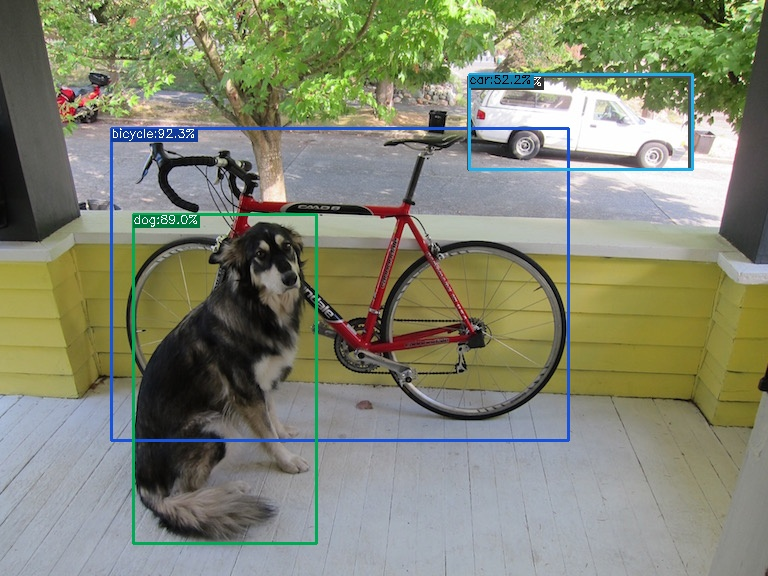

In [ ]:
# or
!python tools/demo.py image -f exps/default/yolox_s.py -c /content/YOLOX/models/yolox_s.pth.tar --path assets/dog.jpg --conf 0.3 --nms 0.65 --tsize 640 --save_result


2021-07-21 12:15:29 | INFO     | __main__:219 - Args: Namespace(camid=0, ckpt='/content/YOLOX/models/yolox_s.pth.tar', conf=0.3, demo='image', exp_file='exps/default/yolox_s.py', experiment_name='yolox_s', fp16=False, fuse=False, name=None, nms=0.65, path='assets/dog.jpg', save_result=True, trt=False, tsize=640)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
2021-07-21 12:15:29 | INFO     | __main__:229 - Model Summary: Params: 8.97M, Gflops: 26.81
2021-07-21 12:15:33 | INFO     | __main__:240 - loading checkpoint
2021-07-21 12:15:33 | INFO     | __main__:245 - loaded checkpoint done.
2021-07-21 12:15:34 | INFO     | __main__:128 - Inf